In [3]:
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df = pd.read_excel('D:/8th sem/Thermal lab/moddata.xlsx')
df.head()

,Mass rate,T,W,hao,Pao
0,7.55,307.8,0.021,338.768360,1.453960
1,6.36,306.9,0.018,335.419116,1.344164
2,8.67,308.2,0.022,343.885040,1.520502
3,12.22,307.9,0.021,351.496540,1.643607
4,15.65,306.7,0.019,353.021473,1.733439


In [5]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler()
print(scaler.fit(df[['Pao']]))

MinMaxScaler()


In [24]:
x = df[['Mass rate','W']]
x = scale(x)
print(x)

[[-0.56326038  0.76429209]
 [-0.98724419 -0.56316259]
 [-0.1642168   1.20677698]
 [ 1.10060884  0.76429209]
 [ 2.32267982 -0.1206777 ]
 [ 1.18255529  0.76429209]
 [-0.56326038  1.20677698]
 [-0.59888927 -0.1206777 ]
 [-0.60601505 -0.56316259]
 [-0.59888927 -1.44813238]
 [-0.5240686  -1.89061727]]


In [25]:
print(scaler.data_max_)

[1.73343932]


In [26]:
print(scaler.transform(df[['Pao']]))

[[0.28205128]
 [0.        ]
 [0.45299145]
 [0.76923077]
 [1.        ]
 [0.81196581]
 [0.39316239]
 [0.23931624]
 [0.18803419]
 [0.37606838]
 [0.39316239]]


In [27]:
y=scaler.transform(df[['Pao']])
print(y)

[[0.28205128]
 [0.        ]
 [0.45299145]
 [0.76923077]
 [1.        ]
 [0.81196581]
 [0.39316239]
 [0.23931624]
 [0.18803419]
 [0.37606838]
 [0.39316239]]


In [28]:
y2 = scale(df[['hao']])
print(y2)

[[-0.54477305]
 [-0.95707377]
 [ 0.08510391]
 [ 1.02209968]
 [ 1.20982301]
 [ 2.29691746]
 [-0.55036268]
 [-0.5782047 ]
 [-0.83636929]
 [-0.59679789]
 [-0.55036268]]


In [29]:
sgdr = SGDRegressor()
sgdr.fit(x, y)

score = sgdr.score(x, y)
print("R-squared:", score)


R-squared: 0.5630883407259986


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [30]:
sgdr = SGDRegressor()
sgdr.fit(x, y2)

score = sgdr.score(x, y2)
print("R2-squared:", score)


R2-squared: 0.7724316999434928


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [31]:
ypred2 = sgdr.predict(x)
ypred2 = ypred2.reshape(-1,1)
print(ypred2)

[[-0.20439997]
 [-0.75592239]
 [ 0.14630381]
 [ 0.87290425]
 [ 1.47948705]
 [ 0.92596206]
 [-0.11206466]
 [-0.4121392 ]
 [-0.50908824]
 [-0.68914514]
 [-0.73303636]]


In [32]:
opt = pd.DataFrame(scaler.inverse_transform(ypred2))
print(opt.to_string(index=False))

       0
1.264596
1.049902
1.401117
1.683964
1.920092
1.704618
1.300540
1.183728
1.145989
1.075897
1.058811


In [33]:
mse = mean_squared_error(y, ypred2)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0)) 

MSE:  0.4294903326109768
RMSE:  0.65535511946652


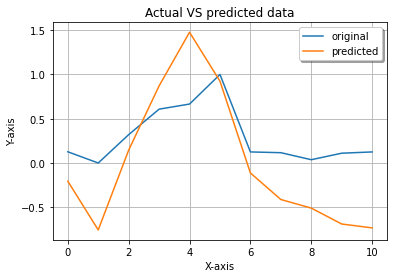

In [18]:
x_ax = range(len(y))
plt.plot(x_ax, y, label="original")
plt.plot(x_ax, ypred2, label="predicted")
plt.title("Actual VS predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [34]:
from sklearn.cross_decomposition import PLSRegression

In [36]:
pls1 = PLSRegression()
pls1.fit(x,y)
score = pls1.score(x, y)
print("R-squared:", score)

R-squared: 0.9108929766613114


In [37]:
z = pls1.predict(x)
z = z.reshape(-1,1)
print(z)

[[0.30134318]
 [0.17532547]
 [0.41268346]
 [0.74898125]
 [1.06979273]
 [0.77102766]
 [0.30532701]
 [0.28379013]
 [0.27788922]
 [0.27183864]
 [0.28798415]]


In [39]:
out2 = pd.DataFrame(scaler.inverse_transform(z))
print(out2.to_string(index=False))

       0
1.461470
1.412414
1.504812
1.635724
1.760608
1.644306
1.463020
1.454637
1.452339
1.449984
1.456269


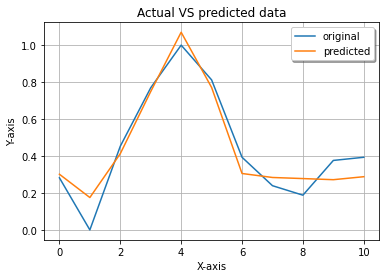

In [40]:
x_ax = range(len(y))
plt.plot(x_ax, y, label="original")
plt.plot(x_ax, z, label="predicted")
plt.title("Actual VS predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()